In [59]:
import pandas as pd

ground_truth_df = pd.read_csv('output/ground_truth.csv', index_col=0)
ground_truth_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
ground_truth_df.head()


,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.073905,4,499,in_sample_Skin-Melanoma
1,0.700639,6,499,in_sample_Skin-Melanoma
2,0.163932,7,499,in_sample_Skin-Melanoma
3,0.026822,8,499,in_sample_Skin-Melanoma
4,0.034701,9,499,in_sample_Skin-Melanoma


In [60]:
ground_truth_df['Sample Names'] = ground_truth_df['Sample Names'].astype(str)

In [61]:
experiment_df = pd.read_csv('output/experiment.csv', index_col=0)
experiment_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.073230,4,499,in_sample_Skin-Melanoma
1,0.700800,6,499,in_sample_Skin-Melanoma
2,0.166505,7,499,in_sample_Skin-Melanoma
3,0.026334,8,499,in_sample_Skin-Melanoma
4,0.033130,9,499,in_sample_Skin-Melanoma


In [68]:
experiment_df['Sample Names'] = experiment_df['Sample Names'].astype(str)

In [69]:
experiment_sig_profiler_df = pd.read_csv('output/experiment_sig_profiles.csv', index_col=0)
experiment_sig_profiler_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_sig_profiler_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.00002,0,499,Head-SCC
1,0.07386,4,499,Head-SCC
2,0.70026,6,499,Head-SCC
3,0.16638,7,499,Head-SCC
4,0.02636,8,499,Head-SCC


In [70]:
experiment_signal_df = pd.read_csv('output/experiment_sig_profiles.csv', index_col=0)
experiment_signal_df.columns = ['findSigExposures',	'best_columns',	'Sample Names',	'Cancer Types']
experiment_signal_df['Sample Names'] = experiment_signal_df['Sample Names'].astype(str)
experiment_signal_df.head()

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.00002,0,499,Head-SCC
1,0.07386,4,499,Head-SCC
2,0.70026,6,499,Head-SCC
3,0.16638,7,499,Head-SCC
4,0.02636,8,499,Head-SCC


In [71]:
def calculate_metrics(predicted, actual, total_values):
    predicted_set = set(predicted)
    actual_set = set(actual)
    all_values_set = set(range(total_values))

    true_positives = len(predicted_set.intersection(actual_set))
    true_negatives = len(all_values_set.difference(actual_set).difference(predicted_set))

    false_negatives = actual_set.difference(predicted_set)
    false_positives = predicted_set.difference(actual_set)

    total_positives = len(actual_set)
    total_negatives = total_values - total_positives

    sensitivity = true_positives / total_positives if total_positives else 0
    specificity = true_negatives / total_negatives if total_negatives else 0

    return sensitivity, specificity, false_negatives, false_positives


In [72]:
import pandas as pd

results = []
total_values = 67

for patient in ground_truth_df['Sample Names'].unique():
    try:
        actualExposures = ground_truth_df.groupby('Sample Names').get_group(patient)['findSigExposures'].tolist()
        actual = ground_truth_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted = experiment_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_sig_profile = experiment_sig_profiler_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
        predicted_signal = experiment_signal_df.groupby('Sample Names').get_group(patient)['best_columns'].tolist()
    except:
        print(f'error: patient', patient)
        continue
    sensitivity, specificity, false_negatives, false_positives = calculate_metrics(predicted, actual, total_values)
    sensitivity_sig_profile, specificity_sig_profile, false_negatives_sig_profile, false_positives_sig_profile = calculate_metrics(predicted_sig_profile, actual, total_values)
    sensitivity_signal, specificity_signal, false_negatives_signal, false_positives_signal = calculate_metrics(predicted_signal, actual, total_values)

    results.append({
        'Pacjent': patient,
        'Sensitivity_our': sensitivity,
        'Specificity_our': specificity,
        'Sensitivity_sig_profile':sensitivity_sig_profile,
        'Specificity_sig_profile':specificity_sig_profile,
        'Sensitivity_signal':sensitivity_signal,
        'Specificity_signal':specificity_signal,
        'actualExposures':  actualExposures,
        'false_negatives_our':  {} if len(false_negatives) == 0 else false_negatives,
        'false_positives_our': {} if len(false_positives) == 0 else false_positives,
        'false_negatives_sig_profile':  {} if len(false_negatives_sig_profile) == 0 else false_negatives_sig_profile,
        'false_positives_sig_profile': {} if len(false_positives_sig_profile) == 0 else false_positives_sig_profile,
        'false_negatives_signal':  {} if len(false_negatives_signal) == 0 else false_negatives_signal,
        'false_positives_signal': {} if len(false_positives_signal) == 0 else false_positives_signal
    })

# Tworzenie DataFrame z wynikami
results_df = pd.DataFrame(results)


error: patient 0


In [73]:
results_df['Sensitivity_our'].mean(), results_df['Sensitivity_sig_profile'].mean(), results_df['Sensitivity_signal'].mean()

(0.9661203359099151, 0.9776529248974138, 0.9776529248974138)

In [74]:
results_df['Specificity_our'].mean(), results_df['Specificity_sig_profile'].mean(), results_df['Specificity_signal'].mean()

(0.9998044564362287, 0.9993258406213349, 0.9993258406213349)

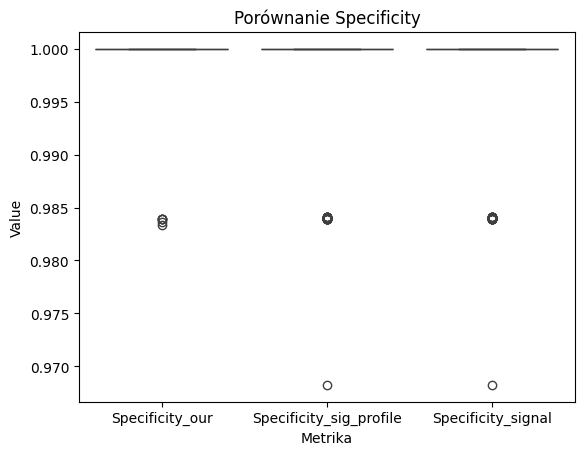

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Specificity_our', 'Specificity_sig_profile', 'Specificity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Specificity')
plt.xlabel('Metrika')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()

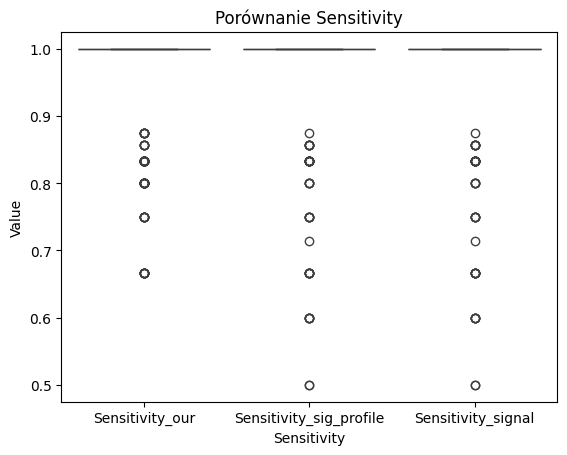

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Przekształcenie DataFrame
melted_df = results_df.melt(value_vars=['Sensitivity_our', 'Sensitivity_sig_profile', 'Sensitivity_signal'], var_name='Metric', value_name='Value')

# Tworzenie wykresu violin plot
sns.boxplot(x='Metric', y='Value', data=melted_df)

# Dodanie tytułu i etykiet
plt.title('Porównanie Sensitivity')
plt.xlabel('Sensitivity')
plt.ylabel('Value')

# Wyświetlenie wykresu
plt.show()


In [78]:
results_df

,Pacjent,Sensitivity_our,Specificity_our,Sensitivity_sig_profile,Specificity_sig_profile,Sensitivity_signal,Specificity_signal,actualExposures,false_negatives_our,false_positives_our,false_negatives_sig_profile,false_positives_sig_profile,false_negatives_signal,false_positives_signal
0,499,1.000000,1.0,1.000000,0.983871,1.000000,0.983871,"[0.0739053928164786, 0.7006391677880139, 0.163...",{},{},{},{0},{},{0}
1,498,0.750000,1.0,0.500000,1.000000,0.500000,1.000000,"[0.8915880394396103, 0.0845924948931173, 0.012...",{8},{},"{8, 9}",{},"{8, 9}",{}
2,497,0.857143,1.0,0.714286,1.000000,0.714286,1.000000,"[0.0024488094617829, 0.0300630438180586, 0.543...",{0},{},"{9, 4}",{},"{9, 4}",{}
3,496,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.1332697807435653, 0.0337464251668255, 0.406...",{},{},{},{},{},{}
4,495,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.0862619808306709, 0.9137380191693292]",{},{},{},{},{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
494,5,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.075785896346644, 0.2533559898045879, 0.2803...",{},{},{},{},{},{}
495,4,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.0828963291649858, 0.0924768051633723, 0.358...",{},{},{},{},{},{}
496,3,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.0904325032765399, 0.2861511577107907, 0.482...",{},{},{},{},{},{}
497,2,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,"[0.0991573033707865, 0.273876404494382, 0.5002...",{},{},{},{},{},{}


In [79]:
import pandas as pd

signatures_false_negatives_our, signatures_false_positives_our = [], []
signatures_false_negatives_sig_profile, signatures_false_positives_sig_profile = [], []
signatures_false_negatives_signal, signatures_false_positives_signal = [], []

for idx, row in results_df.iterrows():
    for item in row['false_negatives_our']:
      signatures_false_negatives_our.append({'Count': row['Pacjent'], 'signature_false_negatives_our': item})
    for item in row['false_positives_our']:
      signatures_false_positives_our.append({'Count': row['Pacjent'], 'signature_false_positives_our': item})
    
    for item in row['false_negatives_sig_profile']:
      signatures_false_negatives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_negatives_sig_profile': item})
    for item in row['false_positives_sig_profile']:
      signatures_false_positives_sig_profile.append({'Count': row['Pacjent'], 'signature_false_positives_sig_profile': item})

    for item in row['false_negatives_signal']:
      signatures_false_negatives_signal.append({'Count': row['Pacjent'], 'signature_false_negatives_signal': item})
    for item in row['false_positives_signal']:
      signatures_false_positives_signal.append({'Count': row['Pacjent'], 'signature_false_positives_signal': item})



In [80]:

# Teraz możesz wykonać grupowanie na podstawie elementów
grouped_fn_our = pd.DataFrame(signatures_false_negatives_our).groupby('signature_false_negatives_our').count().reset_index()
grouped_fp_our = pd.DataFrame(signatures_false_positives_our).groupby('signature_false_positives_our').count().reset_index()
grouped_fn_sig_profile = pd.DataFrame(signatures_false_negatives_sig_profile).groupby('signature_false_negatives_sig_profile').count().reset_index()
grouped_fp_sig_profile = pd.DataFrame(signatures_false_positives_sig_profile).groupby('signature_false_positives_sig_profile').count().reset_index()

grouped_fn_signal = pd.DataFrame(signatures_false_negatives_signal).groupby('signature_false_negatives_signal').count().reset_index()
grouped_fp_signal = pd.DataFrame(signatures_false_positives_signal).groupby('signature_false_positives_signal').count().reset_index()

In [81]:
grouped_fn_our['Count'].sum(), grouped_fn_sig_profile['Count'].sum(), grouped_fn_signal['Count'].sum()
#sygnatura była istotna, a nie jest wykryta

(96, 64, 64)

In [82]:
grouped_fp_our['Count'].sum(), grouped_fp_sig_profile['Count'].sum(), grouped_fp_signal['Count'].sum()
#sygnatura nie była istotna, a jest wykryta

(6, 21, 21)

In [83]:
combined_df_fn = pd.merge(grouped_fn_our, grouped_fn_sig_profile, left_on='signature_false_negatives_our', right_on='signature_false_negatives_sig_profile', how='outer').fillna(0)
combined_df_fn = pd.merge(combined_df_fn, grouped_fn_signal, left_on='signature_false_negatives_our', right_on='signature_false_negatives_signal', how='outer').fillna(0)

In [84]:
indexes = ['SBS1', 'SBS2', 'SBS3', 'SBS4', 'SBS5', 'SBS6', 'SBS7a', 'SBS7b',
           'SBS7c', 'SBS7d', 'SBS8', 'SBS9', 'SBS10a', 'SBS10b', 'SBS11', 'SBS12',
           'SBS13', 'SBS14', 'SBS15', 'SBS16', 'SBS17a', 'SBS17b', 'SBS18',
           'SBS19', 'SBS20', 'SBS21', 'SBS22', 'SBS23', 'SBS24', 'SBS25', 'SBS26',
           'SBS27', 'SBS28', 'SBS29', 'SBS30', 'SBS31', 'SBS32', 'SBS33', 'SBS34',
           'SBS35', 'SBS36', 'SBS37', 'SBS38', 'SBS39', 'SBS40', 'SBS41', 'SBS42',
           'SBS43', 'SBS44', 'SBS45', 'SBS46', 'SBS47', 'SBS48', 'SBS49', 'SBS50',
           'SBS51', 'SBS52', 'SBS53', 'SBS54', 'SBS55', 'SBS56', 'SBS57', 'SBS58',
           'SBS59', 'SBS60', 'SBS84', 'SBS85']


mapping = {index: name for index, name in enumerate(indexes)}


In [85]:
grouped_fn_our['signatures_cat_our'] = grouped_fn_our['signature_false_negatives_our'].map(mapping)
grouped_fn_signal['signatures_cat_signal'] = grouped_fn_signal['signature_false_negatives_signal'].map(mapping)
grouped_fn_sig_profile['signatures_cat_sig_profile'] = grouped_fn_sig_profile['signature_false_negatives_sig_profile'].map(mapping)


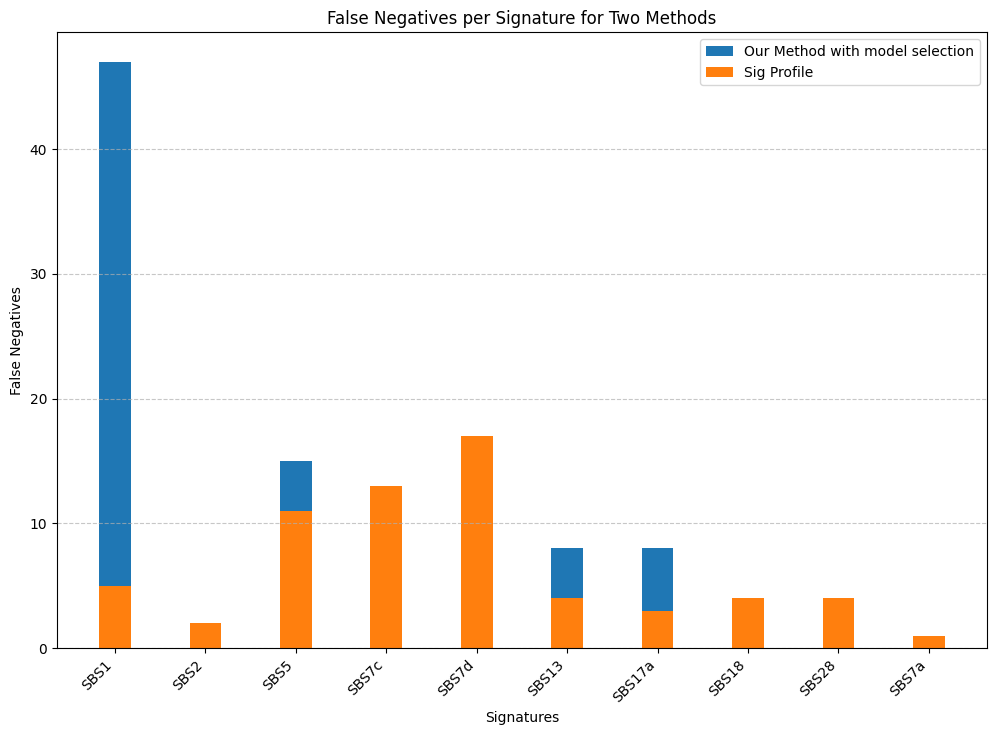

In [86]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fn_our['signatures_cat_our'], grouped_fn_our['Count'], bar_width, label='Our Method with model selection')
#bar2 = ax.bar(combined_df_fn['signature_false_negatives_sig_profile'] + bar_width/2, combined_df_fn['Count_y'], bar_width, label='Sig Profiler Assigment')
bar3 = ax.bar(grouped_fn_sig_profile['signatures_cat_sig_profile'], grouped_fn_sig_profile['Count'], bar_width, label='Sig Profile')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Negatives')
ax.set_title('False Negatives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')
# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [87]:
import pandas as pd 

df = pd.read_csv('/home/amso/Documents/mutation_signatures/output/WGS-decomposition__PCAWG_sigProfiler_SBS_signatures_in_samples.csv')

In [90]:
grouped_fp_our['signatures_cat_our'] = grouped_fp_our['signature_false_positives_our'].map(mapping)
grouped_fp_signal['signatures_cat_signal'] = grouped_fp_signal['signature_false_positives_signal'].map(mapping)
grouped_fp_sig_profile['signatures_cat_sig_profile'] = grouped_fp_sig_profile['signature_false_positives_sig_profile'].map(mapping)


In [91]:
labels_for_plots = pd.read_csv('data/WGS_signatures__sigProfiler_SBS_signatures_2019_05_22.modified.csv', sep='\t')

FileNotFoundError: [Errno 2] No such file or directory: 'data/WGS_signatures__sigProfiler_SBS_signatures_2019_05_22.modified.csv'

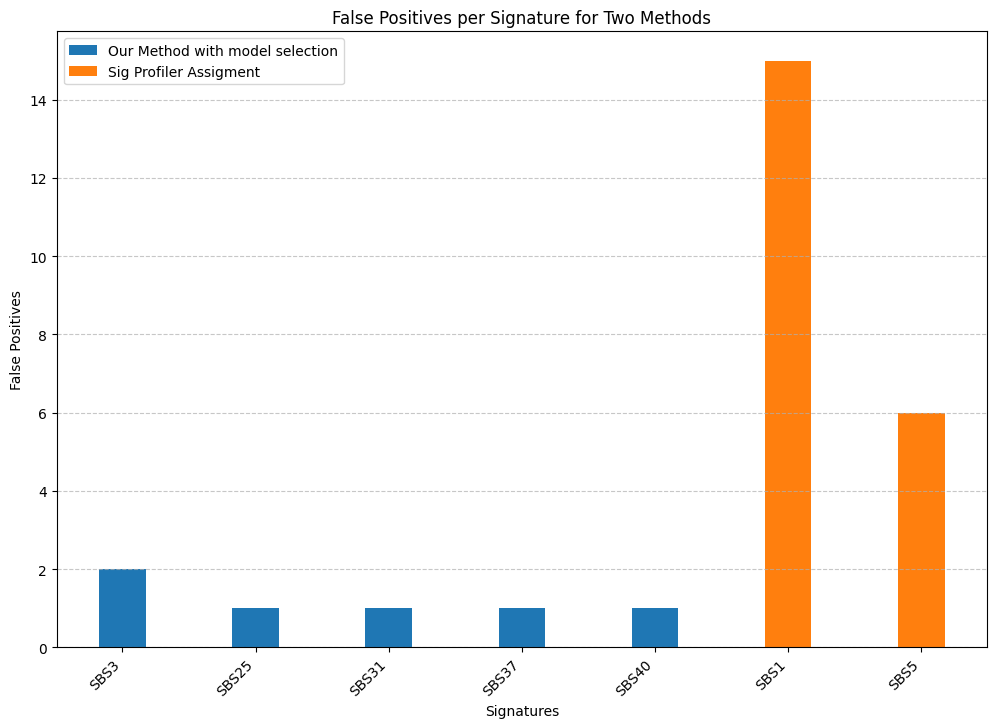

In [92]:
import matplotlib.pyplot as plt

# Twoje wcześniejsze ustawienia i dane
fig, ax = plt.subplots(figsize=(12, 8))
bar_width = 0.35

# Rysowanie wykresów słupkowych
bar1 = ax.bar(grouped_fp_our['signatures_cat_our'], grouped_fp_our['Count'], bar_width, label='Our Method with model selection')
bar2 = ax.bar(grouped_fp_sig_profile['signatures_cat_sig_profile'], grouped_fp_sig_profile['Count'], bar_width, label='Sig Profiler Assigment')
#bar3 = ax.bar(combined_df_fp['signature_falsepositive_signal'] + bar_width/2, combined_df_fn['Count'], bar_width, label='Signal')

# Ustawienia etykiet i tytułu
ax.set_xlabel('Signatures')
ax.set_ylabel('False Positives')
ax.set_title('False Positives per Signature for Two Methods')
ax.legend()
plt.xticks(rotation=45, ha='right')

# Dodanie siatki i wyświetlenie wykresu
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


In [25]:
ground_truth_df

,findSigExposures,best_columns,Sample Names,Cancer Types
0,0.092256,0,SP95550,Uterus-AdenoCA
1,0.063790,1,SP95550,Uterus-AdenoCA
2,0.158236,4,SP95550,Uterus-AdenoCA
3,0.099229,16,SP95550,Uterus-AdenoCA
4,0.586489,44,SP95550,Uterus-AdenoCA
...,...,...,...,...
10431,0.100450,0,SP117655,Biliary-AdenoCA
10432,0.087002,1,SP117655,Biliary-AdenoCA
10433,0.122098,4,SP117655,Biliary-AdenoCA
10434,0.054098,16,SP117655,Biliary-AdenoCA


In [26]:
import pandas as pd
import numpy as np

# Funkcja do tworzenia wektora dla danej grupy
def create_vector(group):
    vector = np.zeros(67)
    for _, row in group.iterrows():
        index = row['best_columns']
        if index < 67:
            vector[index] = row['findSigExposures']
    return vector

def spearman_correlation(x, y):
    rx = np.argsort(np.argsort(x))
    ry = np.argsort(np.argsort(y))  
    return np.corrcoef(rx, ry)[0, 1]
    

# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_df.groupby('Sample Names').apply(create_vector)

correlations_our = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_our[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_our = pd.DataFrame(list(correlations_our.items()), columns=['Sample Names', 'Correlation'])

SP102485
SP102591
SP135444
SP86775


In [27]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_sig_profiler_df.groupby('Sample Names').apply(create_vector)

correlations_sig_profile = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_sig_profile[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_sig_profile = pd.DataFrame(list(correlations_sig_profile.items()), columns=['Sample Names', 'Correlation'])

In [28]:
# Grupowanie i tworzenie wektorów dla df1 i df2
groups_df1 = ground_truth_df.groupby('Sample Names').apply(create_vector)
groups_df2 = experiment_signal_df.groupby('Sample Names').apply(create_vector)

correlations_signal = {}
# Obliczanie korelacji dla każdej grupy
for sample_name in groups_df1.index:
    try:
        correlation = np.corrcoef(groups_df1[sample_name], groups_df2[sample_name])[0, 1]
        correlation_spearman = spearman_correlation(groups_df1[sample_name], groups_df2[sample_name])
        correlations_signal[sample_name] = correlation_spearman
    except:
        print(sample_name)
correlations_df_signal = pd.DataFrame(list(correlations_signal.items()), columns=['Sample Names', 'Correlation'])

In [29]:
correlations_df_our['Correlation'].mean(), correlations_df_sig_profile['Correlation'].mean(), correlations_df_signal['Correlation'].mean()

(0.9964141924911419, 0.9790078927325585, 0.9706449185235866)

In [58]:
import pandas as pd 

def save_to_dataframe(best_columns, findSigExposures, cancer_type, patient):
    """
    Saves the best_columns and findSigExposures to a pandas DataFrame.
    """
    # Create a DataFrame with findSigExposures as a column
    df = pd.DataFrame(findSigExposures, columns=['findSigExposures'])
    # Add the best_columns as another column, ensuring the length matches
    # If best_columns is shorter, pad with None or a default value
    df['best_columns'] = pd.Series(best_columns).reindex(df.index)
    df['Cancer Types'] = cancer_type
    df['Sample Names'] = patient

    return df

import numpy as np

tumorBRCA = np.genfromtxt('data/data_for_deconstructSigs.csv', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/signatures_in_sample.csv')
SigProfilerAssignment = pd.read_csv('output/Assignment_Solution/Activities/Assignment_Solution_Activities.txt',sep='\t')


ground_truth = SigProfilerAssignment.drop(columns=['Samples'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), SigProfilerAssignment.iloc[i]['Samples'], 'Head-SCC')
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('output/experiment_sig_profiles.csv')

In [ ]:
SigProfilerAssignment

In [ ]:
pd.read_csv('output/signal.exposures.csv',sep=',')

In [34]:
import pandas as pd 



import numpy as npdata

tumorBRCA = np.genfromtxt('data/data_for_deconstructSigs.dat', delimiter='\t', skip_header=1)
tumorBRCA = np.delete(tumorBRCA, 0, axis=1)

df = pd.read_csv('data/signatures_in_sample.csv')
signalAssignment = pd.read_csv('output/signal.exposures.csv',sep=',')


ground_truth = signalAssignment.drop(columns=['Samples', 'unassigned'])

ground_truth.columns = [x for x in range(0, 67)]
ground_truth_df = pd.DataFrame()

for i in range(tumorBRCA.shape[1]):
    first_col = tumorBRCA[:, i]
    patient = ground_truth.iloc[i]
    patient = patient / patient.sum()

    non_zero_condition = (patient != 0)
    indexes = non_zero_condition[non_zero_condition].index.tolist()

    r = save_to_dataframe(indexes, patient[indexes].to_numpy(), signalAssignment.iloc[i]['Samples'], 'Head-SCC')
    ground_truth_df = pd.concat([r, ground_truth_df], ignore_index=True)


ground_truth_df.to_csv('experiment_signal.csv')